In [1]:
val path = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
// note: use sbt assembly to create jar
interp.load.cp(os.Path(path))
import $ivy.`org.plotly-scala::plotly-almond:0.8.2`
import $ivy.`com.lihaoyi:ujson_2.13:1.3.8`
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`

import ujson.Value
import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")
import $ivy.`com.github.pathikrit::better-files:3.9.1`
import better.files._
import $ivy.`com.lihaoyi::ujson:1.3.12`
import $ivy.`com.lihaoyi::requests:0.6.5`



path: String = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
import $ivy.$                                      

import $ivy.$                             
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`


import ujson.Value

import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")

import $ivy.$                                         

import better.files._

import $ivy.$                          

import $ivy.$                            



In [2]:
import scala.util.Random
import edu.colorado.plv.bounder.Driver
import edu.colorado.plv.bounder.RunConfig
import edu.colorado.plv.bounder.symbolicexecutor.state.PureConstraint
import upickle.default.read
import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

import scala.util.Random

import edu.colorado.plv.bounder.Driver

import edu.colorado.plv.bounder.RunConfig

import edu.colorado.plv.bounder.symbolicexecutor.state.PureConstraint

import upickle.default.read

import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}


import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._

In [3]:
import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode
import edu.colorado.plv.bounder.symbolicexecutor.state.{DBPathNode,IPathNode}
import edu.colorado.plv.bounder.ir._
import edu.colorado.plv.bounder.symbolicexecutor.QueryFinished
import edu.colorado.plv.bounder.BounderUtil
def obsMessagesStr(nodes:List[DBPathNode]):List[DBPathNode] = {
nodes.flatMap{n =>
  n.qry.loc match {
    case c @ CallinMethodReturn(fmwClazz, fmwName) => Some(n)
    case c @ CallinMethodInvoke(fmwClazz, fmwName) => Some(n)
    case c @ GroupedCallinMethodInvoke(targetClasses, fmwName) => Some(n)
    case c @ GroupedCallinMethodReturn(targetClasses, fmwName) => Some(n)
    case c @ CallbackMethodInvoke(fmwClazz, fmwName, loc) => Some(n)
    case c @ CallbackMethodReturn(fmwClazz, fmwName, loc, line) => Some(n)
    case _ => None
  }}
}

// implicit val db = DBOutputMode("/Users/shawnmeier/Desktop/db_triage/connectbot1.db",true)
implicit val db = DBOutputMode("/Users/shawnmeier/Desktop/bounder_debug_data/deref2.db",true)

import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode

import edu.colorado.plv.bounder.symbolicexecutor.state.{DBPathNode,IPathNode}

import edu.colorado.plv.bounder.ir._

import edu.colorado.plv.bounder.symbolicexecutor.QueryFinished

import edu.colorado.plv.bounder.BounderUtil

defined function obsMessagesStr
db: DBOutputMode = DBOutputMode(
  dbfile = "/Users/shawnmeier/Desktop/bounder_debug_data/deref2.db",
  truncate = true
)

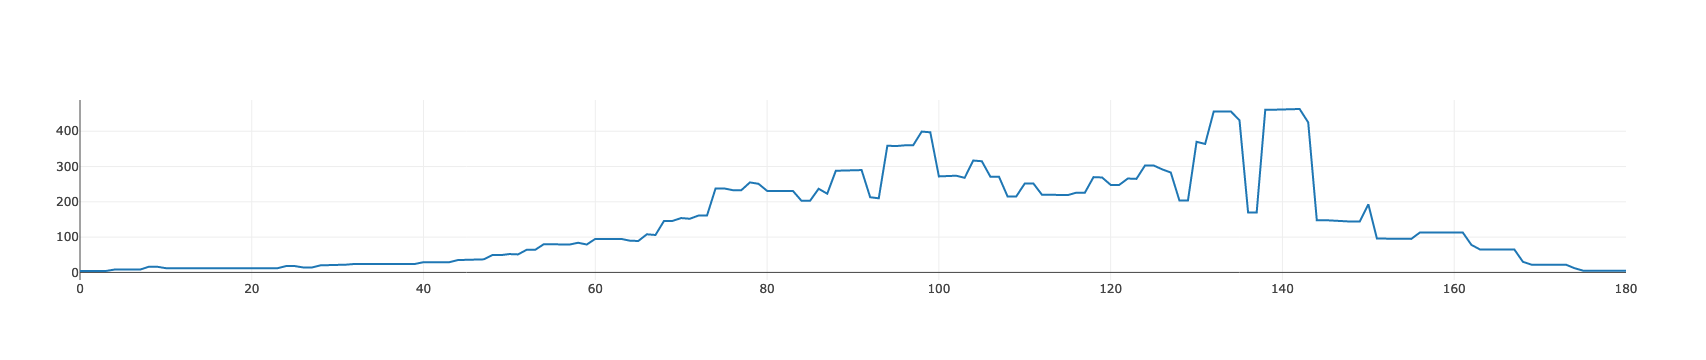

defined object LiveNodes
res28_1: String = "plot-6f827070-7754-4d01-b7b4-14a732f84786"

In [29]:
object LiveNodes{ // Create object to supress output TODO: upgrade ammonite at some point
    val live = db.getAllLiveNodes()
    val (x,y) = live.groupBy(_.depth).map(a => (a._1, a._2.size)).toList.sortBy(_._1).unzip
//     val noSuc = live.filter(a => !live.exists(b => b.)) // find set of "active" nodes

// val (x, y) = Seq(
//   "Banana" -> 10,
//   "Apple" -> 8,
//   "Grapefruit" -> 5
// ).unzip
}

Scatter(LiveNodes.x, LiveNodes.y).plot()

In [32]:
Html("""
<head>
    <script src="https://cdn.plot.ly/plotly-2.13.1.min.js"></script>
</head>
<body>
some text
    <div id="gd"></div>

    <script>
        Plotly.newPlot("gd", /* JSON object */ {
            "data": [{ "y": [1, 2, -1] }],
            "layout": { "width": 600, "height": 400}
        })
    </script>
</body>

""")

some text

In [23]:
//**** plot with javascript? doesn't seem to work
// Javascript(
// """var script = document.createElement('script'); script.type = 'text/javascript'; script.src = '//cdn.jsdelivr.net/npm/vega@5'; document.head.appendChild(script); var script = document.createElement('script'); script.type = 'text/javascript'; script.src = '//cdn.jsdelivr.net/npm/vega-embed@6'; document.head.appendChild(script); """)
// val spec = ujson.read(requests.get("https://vega.github.io/vega/examples/bar-chart.vg.json").text)

// spec("data")(0)("values") = ujson.Arr(
//   ujson.Obj("category" -> "Epic", "amount" -> 50),
//   ujson.Obj("category" -> "amounts", "amount" -> 100)
// )
// Javascript(s""" vegaEmbed(element, $spec).then(function(result) { }).catch(console.error) """)

// **** display html
// Html("<b>Bold</b>")

// kernel.publish.display(
//   almond.interpreter.api.DisplayData(
//     Map(
//       // if we set up an extension for application/myapp+json, first element should be picked
//       "application/myapp+json" -> """{"a": "C"}""",
//       // else, text/html should be displayed
//       "text/html" -> "<b>AB</b>"
//     )
//   )
// )
// Json("""{"foo":2,"bar":3}""")
// *** to show console for html output in jupyter notebook in vs code: help -> toggle developer tools
// Javascript("console.log(3+3)")
// Javascript(
// """
// var script = document.createElement('script'); 
// script.type = 'text/javascript'; 
// script.src = 'https://d3js.org/d3.v4.js'; 
// document.head.appendChild(script); 
// """)
// val d3 = File("d3.v4.js").contentAsString()
// Javascript(d3)
Html(s"""
<!DOCTYPE html>
<html>
<head>
<h1>...</h1>
<script type="text/javascript" src="d3.v4.js"></script>
</head>

<!-- Add a svg shape. Note that the 'target' class is attributed to the circle -->
<svg> 
  <circle class="target" style="fill: #69b3a2" stroke="black" cx=50 cy=50 r=40></circle>
</svg>

<script type="text/javascript" src="foo.js"></script>

<script>

  d3.select(".target")  // select the elements that have the class 'target'
    .style("stroke-width", 8) // change their style: stroke width is not equal to 8 pixels
</script>
</html>
""")



<!DOCTYPE html>
 
 
 ... 

 

<!-- Add a svg shape. Note that the 'target' class is attributed to the circle -->

In [24]:


Html("""
<svg> 
  <circle class="target" style="fill: #69b3a2" stroke="black" cx=50 cy=50 r=40></circle>
</svg>

<!-- Load d3.js -->
<script src="https://d3js.org/d3.v4.js"></script>

<script>
d3.select(".target").style("stroke-width", 8) // change their style: stroke width is not equal to 8 pixels
</script>
""")

<!-- Load d3.js -->

In [11]:
Html("""
<script>
console.log("hi there")
</script>
""")

In [ ]:
// LiveNodes.live.filter(pn => pn.qry.getState.get.sf.traceAbstraction.rightOfArrow.size > 0)
// LiveNodes.live.head
def groupByLocation(nodes:Iterable[DBPathNode]) = {
    
}
groupByLocation(LiveNodes.live)

In [ ]:
def getEndLive()= {
    // Note: this cant distinguish live at end from nodes with no pred locations
    val live = db.getLive()
    val filtLive:Set[IPathNode] = live.filter{a => a.qry.isLive && a.subsumed.isEmpty}.map(_.asInstanceOf[IPathNode])
    // BounderUtil.computeDepthOfWitOrLive(filtLive, QueryFinished)
    filtLive
}

def dumpFrom(liveNodes: Set[IPathNode],outF:String):Unit = {
    import edu.colorado.plv.bounder.symbolicexecutor.state.PrettyPrinting
    val pp = new PrettyPrinting()
    val inspQ: Set[IPathNode] = liveNodes
    val pptr = pp.witnessToTrace(inspQ.toList,false)
    println(s"inspection set size: ${inspQ.size}")
    pp.dumpDebugInfo(inspQ.toSet, "timeout", true, Some(outF))
}

dumpFrom(getEndLive(), "/Users/shawnmeier/Desktop/55select/org.andstatus/sample/res_1763/specout/org.andstatus/sample")

In [ ]:
// LiveNodes.live.map{_.depth}
// dumpFrom(LiveNodes.live,"/Users/shawnmeier/Desktop/AntennapodExecute_bug_workingdir")

In [ ]:
def dumpFromDepth(liveNodes: Set[DBPathNode],outF:String, sampDepth:Int):Unit = {
    import edu.colorado.plv.bounder.symbolicexecutor.state.PrettyPrinting
    val pp = new PrettyPrinting()
    val inspQ: Set[IPathNode] = liveNodes.filter(n => n.depth == sampDepth).map(_.asInstanceOf[IPathNode])
    val pptr = pp.witnessToTrace(inspQ.toList,false)
    println(s"inspection set size: ${inspQ.size}")
    pp.dumpDebugInfo(inspQ.toSet, "timeout", true, Some(outF))
}
// pp.qryString(inspQ.qry)
// Test1.pptr.take(3)

dumpFromDepth(LiveNodes.live, 
              "/Users/shawnmeier/Desktop/AntennapodExecute_fix_workingdir", 
                38)

In [ ]:
def getEXSet() = {
    val locGroup = LiveNodes.live.groupBy(n => n.qry.loc)
    val mostVisitedList = locGroup.map{a => (a._1,a._2.size)}.toList.sortBy(a => a._2).reverse
    val mostVisitedNode = mostVisitedList.head._1
    
    val pp = new PrettyPrinting()
    val nodeList = locGroup(mostVisitedNode)
    val outf = File("/Users/shawnmeier/Desktop/db_triage/states.txt")
    nodeList.foreach{n => 
        outf.appendLine().append(pp.qryString(n.qry))
        outf.appendLine().append(s"subs: ${n.subsumedID}")
    }
}
    
getEXSet()

In [ ]:
LiveNodes.live.groupBy(n => n.subsumed.isDefined).map{a => (a._1,a._2.size)}

In [ ]:
LiveNodes.live.groupBy(_.dbgTrace).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse

In [ ]:
LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__10335), I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onResume, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse.map(println)

In [ ]:
object OUT32{
    import edu.colorado.plv.bounder.symbolicexecutor.state.State
    val dbgNodes = LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CIExit_Dialog_show, I_CIEnter_Dialog_dismiss))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size,a._2)).toList.sortBy(_._2).reverse
    val nodeList = OUT32.dbgNodes.head._3.toList
    def pp(s:State) = {
        val o = List("locals:","heap:","types:","trace:").foldLeft(s.toString){
            case (acc,v) => acc.replace(s"$v", s"\n$v")
        }
        println(o)
    }
    val stateList = nodeList.map(n => n.qry.getState.get)
    val stackGrouped = stateList.groupBy(_.sf.callStack.toString()).toList.sortBy(_._2.size).reverse
}
OUT32.stackGrouped.map(a => (a._1, a._2.size))
//OUT32.stateList.sortBy(s => s.sf.callStack.toString()).take(10).foreach{OUT32.pp}


In [ ]:
import upickle.default.{macroRW, read, write, ReadWriter => RW}
val js = ujson.Arr(List(List(1),List(2)))
js.toString

In [ ]:
List("fooo","bar","a").sortBy(_.length).take(5)